<a href="https://colab.research.google.com/github/adamoosya/182Proj/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
torch.manual_seed(1337)

# Download modules

In [3]:
url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/hyperparameters.py"
!wget --no-cache --backups=1 {url}
from hyperparameters import BATCH_SIZE, BLOCK_SIZE, MAX_ITERS, EVAL_INTERVAL, LEARNING_RATE, EVAL_ITERS, N_EMBD, N_HEAD, \
  N_LAYER, DROPOUT, DEVICE, DATA_CATEGORIES, TRAIN_DATA_CATEGORIES, VAL_DATA_CATEGORIES

url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/tokenizer.py"
!wget --no-cache --backups=1 {url}
from tokenizer import tokenize, detokenize, IS_TO_TOKEN, AS_TOKEN, END_TOKEN, VOCAB_SIZE, CHAR_TO_TOKEN, TOKEN_TO_CHAR

url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/dataloader.py"
!wget --no-cache --backups=1 {url}
from dataloader import get_context_test, get_context_example, get_batch

url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/model.py"
!wget --no-cache --backups=1 {url}
from model import estimate_loss, GPTLanguageModel

url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/data.py"
!wget --no-cache --backups=1 {url}
from data import load_data

--2025-05-04 21:51:09--  https://raw.githubusercontent.com/adamoosya/182Proj/main/hyperparameters.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3279 (3.2K) [text/plain]
Failed to rename hyperparameters.py to hyperparameters.py.1: (2) No such file or directory
Saving to: ‘hyperparameters.py’

hyperparameters.py  100%[===================>]   3.20K  --.-KB/s    in 0s      

2025-05-04 21:51:10 (59.8 MB/s) - ‘hyperparameters.py’ saved [3279/3279]

--2025-05-04 21:51:10--  https://raw.githubusercontent.com/adamoosya/182Proj/main/tokenizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connec

# Get morphological transformations

In [4]:
DATA, TRAIN_DATA, VAL_DATA = load_data()

# Setup Model

In [5]:
def evaluate(model, dataset, category=None, num_to_evaluate=100):
    correct = 0
    total = 0
    model.eval()
    for _ in range(num_to_evaluate):
        context, target = get_context_test(dataset, category=category)
        if model.test(context, target):
            correct += 1
        total += 1
    model.train()
    return correct / total

In [6]:
model = GPTLanguageModel()
model = model.to(DEVICE)
# print the number of parameters in the model
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

10.762783 M parameters


# Train Model

In [ ]:
for iter in range(MAX_ITERS):

    # every once in a while evaluate the loss on train and val sets
    if iter % EVAL_INTERVAL == EVAL_INTERVAL-1:

      train_score = evaluate(model, TRAIN_DATA, category=None)
      print(f"Epoch: {iter}, Train Score: {train_score:.4f}")

      val_score = evaluate(model, VAL_DATA, category=None)
      print(f"Epoch: {iter}, Validation Score: {val_score:.4f}")

      checkpoint_name = f"epoch_{iter+1:04d}.pth"  # Format with leading zeros
      torch.save(model.state_dict(), os.path.join("checkpoint", checkpoint_name))

    # sample a batch of data
    xb, yb, mask = get_batch(TRAIN_DATA)

    # evaluate the loss
    logits, loss = model(xb, yb, mask)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

Epoch: 499, Train Score: 0.3800
Epoch: 499, Validation Score: 0.2100
Epoch: 999, Train Score: 0.3100
Epoch: 999, Validation Score: 0.3000
Epoch: 1499, Train Score: 0.5300
Epoch: 1499, Validation Score: 0.3600
Epoch: 1999, Train Score: 0.5500
Epoch: 1999, Validation Score: 0.3400
Epoch: 2499, Train Score: 0.4900
Epoch: 2499, Validation Score: 0.3800
Epoch: 2999, Train Score: 0.5300
Epoch: 2999, Validation Score: 0.3000
Epoch: 3499, Train Score: 0.5600
Epoch: 3499, Validation Score: 0.3900
Epoch: 3999, Train Score: 0.6500
Epoch: 3999, Validation Score: 0.5100
Epoch: 4499, Train Score: 0.5700
Epoch: 4499, Validation Score: 0.5100
Epoch: 4999, Train Score: 0.6400
Epoch: 4999, Validation Score: 0.5000


# Download model checkpoints

In [7]:
if not os.path.exists("checkpoint"):
    os.makedirs("checkpoint")

checkpoints = [
    "epoch_0500.pth",
    "epoch_1000.pth",
    "epoch_1500.pth",
    "epoch_2000.pth",
    "epoch_2500.pth",
    "epoch_3000.pth",
    "epoch_3500.pth",
    "epoch_4000.pth",
    "epoch_4500.pth",
    "epoch_5000.pth",
]

for checkpoint in checkpoints:
    url = f"https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/{checkpoint}"
    !wget --no-cache --backups=1 -O checkpoint/{checkpoint} {url}


--2025-05-04 21:52:58--  https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/epoch_0500.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52567888 (50M) [application/octet-stream]
Saving to: ‘checkpoint/epoch_0500.pth’

checkpoint/epoch_05 100%[===================>]  50.13M  --.-KB/s    in 0.1s    

2025-05-04 21:53:03 (501 MB/s) - ‘checkpoint/epoch_0500.pth’ saved [52567888/52567888]

--2025-05-04 21:53:03--  https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/epoch_1000.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting 

# Generate loss/accuracy data

In [13]:
losses = {
    'train': {category: [] for category in TRAIN_DATA_CATEGORIES},
    'val': {category: [] for category in VAL_DATA_CATEGORIES}
}
accuracies = {
    'train': {category: [] for category in TRAIN_DATA_CATEGORIES},
    'val': {category: [] for category in VAL_DATA_CATEGORIES}
}

losses['train'][None] = []
accuracies['train'][None] = []
losses['val'][None] = []
accuracies['val'][None] = []

In [14]:
checkpoint_dir = "checkpoint"
checkpoints = [f for f in os.listdir(checkpoint_dir) if f.endswith(".pth")]
checkpoints.sort()

for checkpoint_name in checkpoints:
    checkpoint_path = os.path.join(checkpoint_dir, checkpoint_name)
    print(f"Loading checkpoint: {checkpoint_name}")
    model.load_state_dict(torch.load(checkpoint_path))
    model.eval()

    for split, dataset in zip(losses, [TRAIN_DATA, VAL_DATA]):
        for category in losses[split]:
            losses[split][category].append(estimate_loss(model, dataset, category))
            accuracies[split][category].append(evaluate(model, dataset, category))

Loading checkpoint: epoch_0500.pth
Loading checkpoint: epoch_1000.pth
Loading checkpoint: epoch_1500.pth
Loading checkpoint: epoch_2000.pth
Loading checkpoint: epoch_2500.pth
Loading checkpoint: epoch_3000.pth
Loading checkpoint: epoch_3500.pth
Loading checkpoint: epoch_4000.pth
Loading checkpoint: epoch_4500.pth
Loading checkpoint: epoch_5000.pth


In [15]:
with open('losses.pkl', 'wb') as f:
    pickle.dump(losses, f)

with open('accuracies.pkl', 'wb') as f:
    pickle.dump(accuracies, f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True
True


#Load loss/accuracy data

In [8]:
!wget --no-cache --backups=1 https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/losses.pkl
!wget --no-cache --backups=1 https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/accuracies.pkl

with open('losses.pkl', 'rb') as f:
    losses = pickle.load(f)

with open('accuracies.pkl', 'rb') as f:
    accuracies = pickle.load(f)


--2025-05-04 21:53:56--  https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/losses.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95700 (93K) [application/octet-stream]
Failed to rename losses.pkl to losses.pkl.1: (2) No such file or directory
Saving to: ‘losses.pkl’

losses.pkl          100%[===================>]  93.46K  --.-KB/s    in 0.003s  

2025-05-04 21:53:57 (36.3 MB/s) - ‘losses.pkl’ saved [95700/95700]

--2025-05-04 21:53:57--  https://raw.githubusercontent.com/adamoosya/182Proj/main/checkpoint/accuracies.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connec

In [34]:
accuracies['val']['base_to_past_participle']

[0.16, 0.23, 0.2, 0.26, 0.23, 0.32, 0.2, 0.3, 0.33, 0.26]

#Load model from checkpoint and test

In [21]:
checkpoint_path = 'checkpoint/epoch_5000.pth'

model = GPTLanguageModel()
model = model.to(DEVICE)
print('Loading checkpoint')
model.load_state_dict(torch.load(checkpoint_path))

Loading checkpoint


<All keys matched successfully>

In [30]:
context, target = get_context_test(VAL_DATA, category='verb_to_progressive_verb')
model.test(context, target, output=True)

Context: recall#recalling$ponder#, Prediction: pondering, Expected: pondering


True

In [ ]:
context, target = 'dog#dogs$cat#', 'cats'
model.test(context, target, output=True)

Context: dog#dogs$cat#, Prediction: cats, Expected: cats


True

# Create loss/accuracy graphs

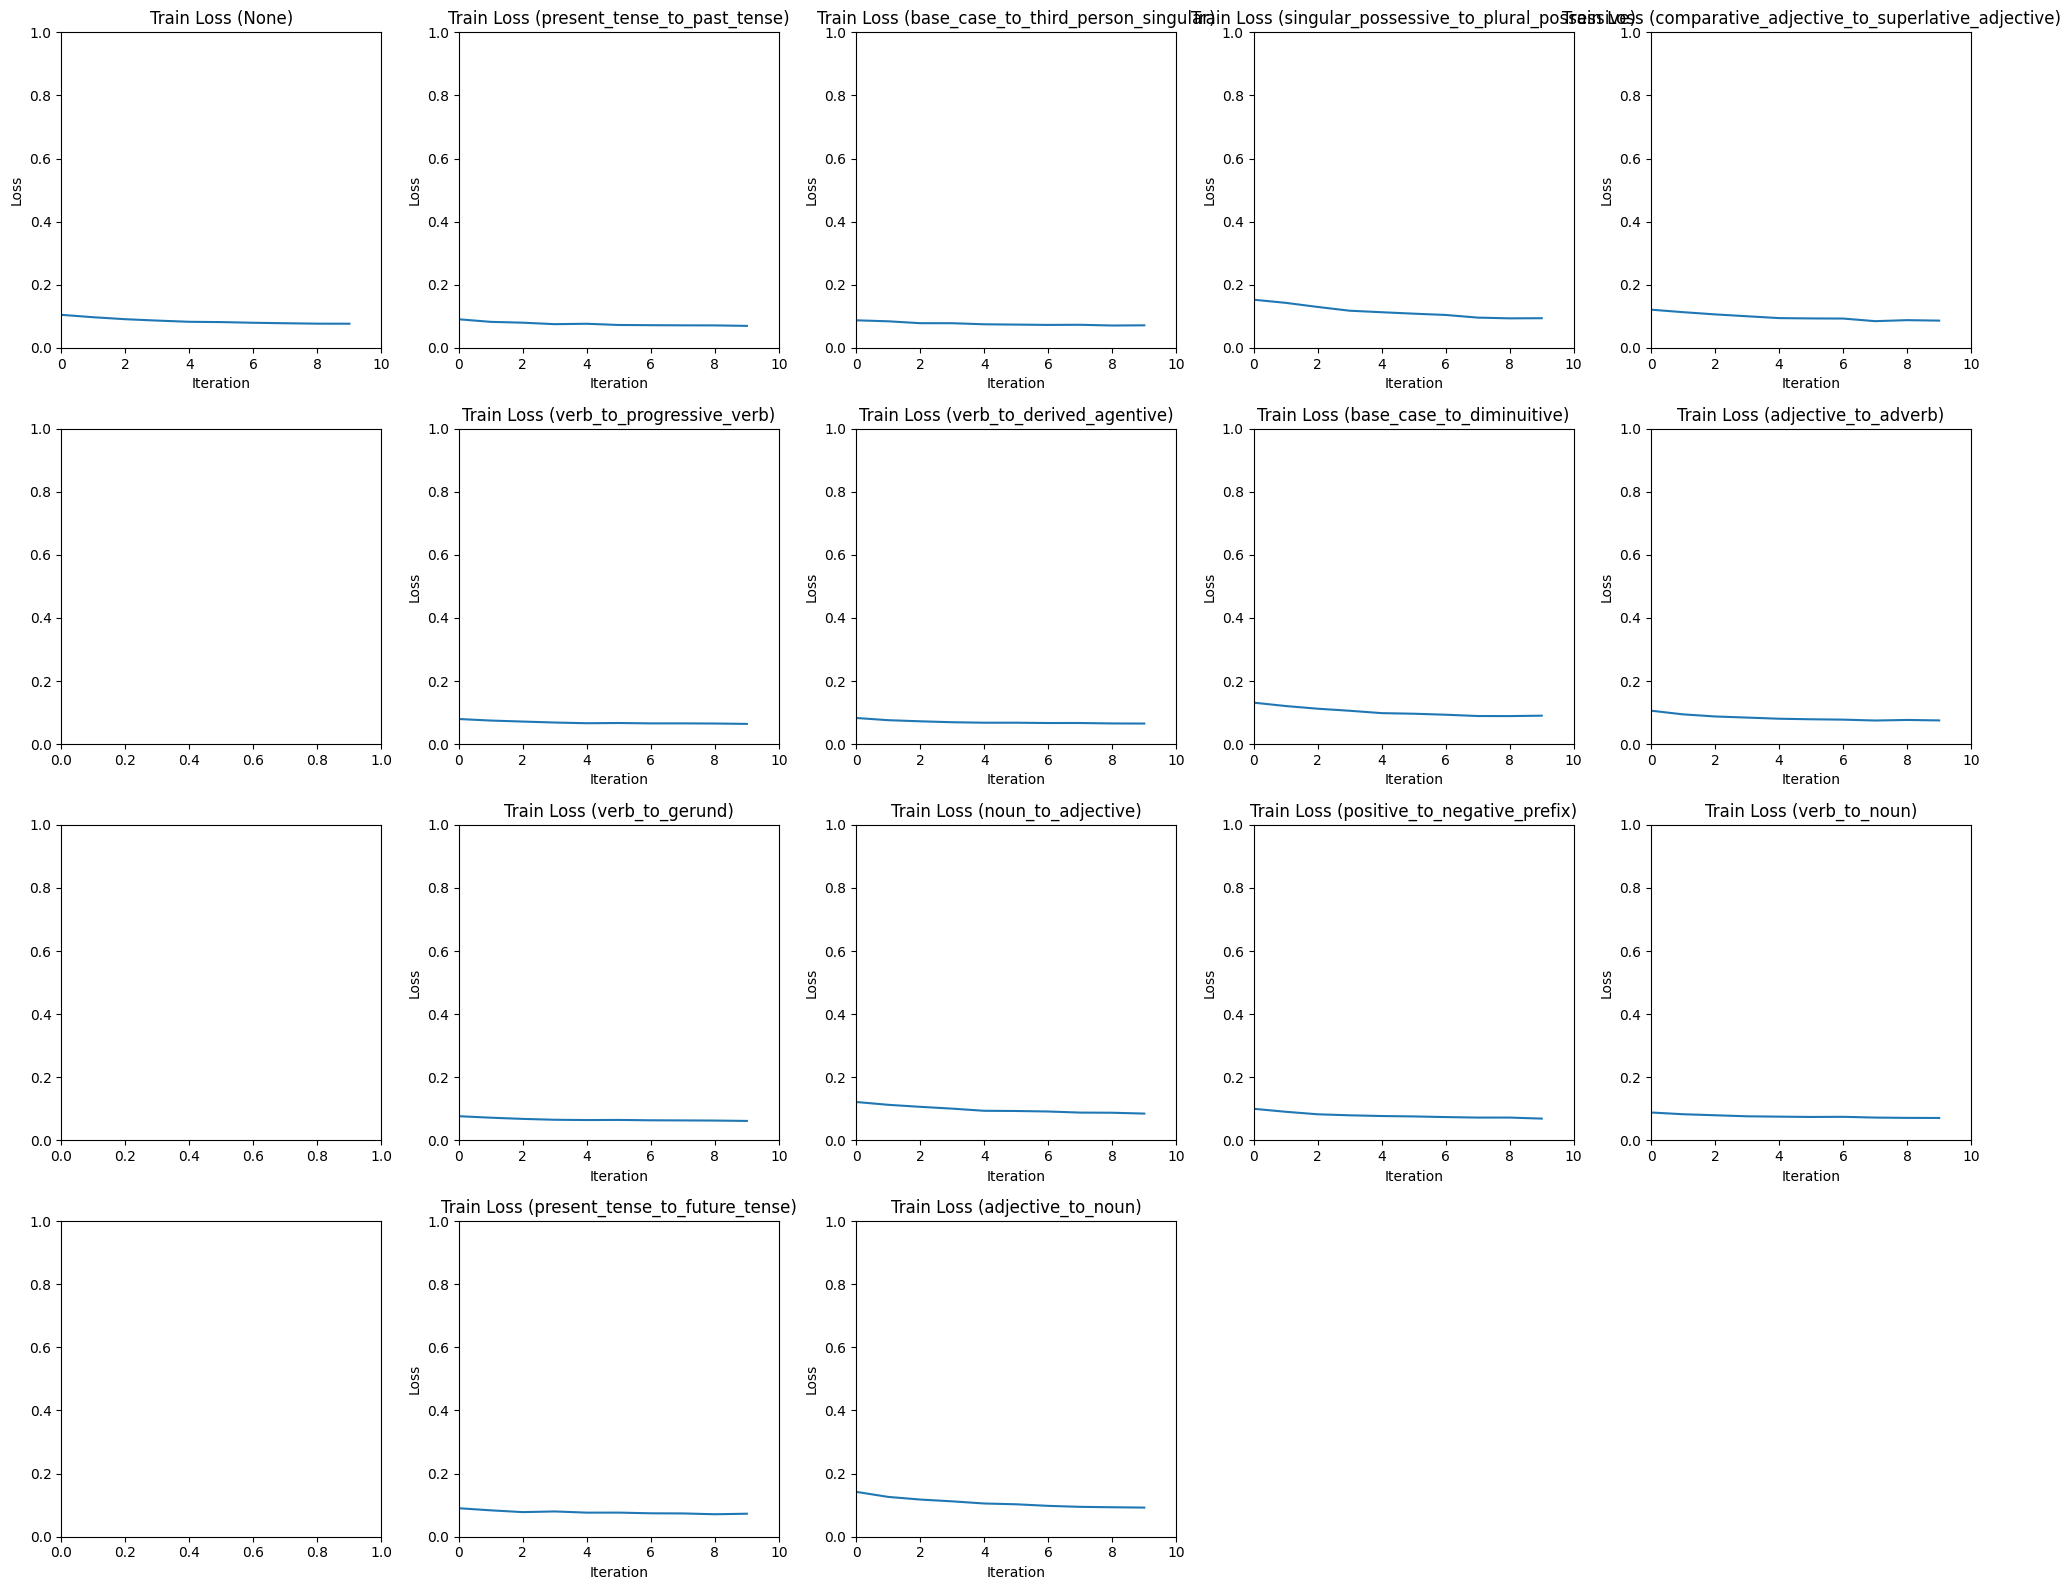

In [31]:
# prompt: I want you to create a bunch of plots in matplotlib. I want to plot the train losses. The losses can be found in losses['train'] for each category. All the losses should be grouped up together in the same plot. The losses for category None should be 4x4 and on the left hand side. It should be labelled "Train Loss". There are 16 other categories. Those should all be put in a 4x4 grid next to the None category, and each should be 1x1. The x and y max and min values for all the plots should be standardized. The y value should be between 0 and 1, and the x value should be between 0 and 10.  The losses graph for the None category should be 4 times the size as the losses for the other categories

import matplotlib.pyplot as plt

# Assuming 'losses' dictionary is already populated as in your provided code.

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for plots

# Plot for category 'None' (larger size)
axes[0, 0].plot(losses['train'][None])
axes[0, 0].set_title("Train Loss (None)")
axes[0, 0].set_xlabel("Iteration")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_xlim(0, 10)
axes[0, 0].set_ylim(0, 1)

# Merge the remaining subplots
for i in range(4):
    for j in range(1,5): # start from index 1
        ax = axes[i][j]
        category_index = i * 4 + j # Calculate the index to use for other categories

        if category_index < len(TRAIN_DATA_CATEGORIES) and TRAIN_DATA_CATEGORIES[category_index] != None:
          category = TRAIN_DATA_CATEGORIES[category_index]
          ax.plot(losses['train'][category])
          ax.set_title(f"Train Loss ({category})")
          ax.set_xlabel("Iteration")
          ax.set_ylabel("Loss")
          ax.set_xlim(0, 10)
          ax.set_ylim(0, 1)
        else:
          ax.axis('off') # Hide the empty subplots

plt.savefig('train_losses.png')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


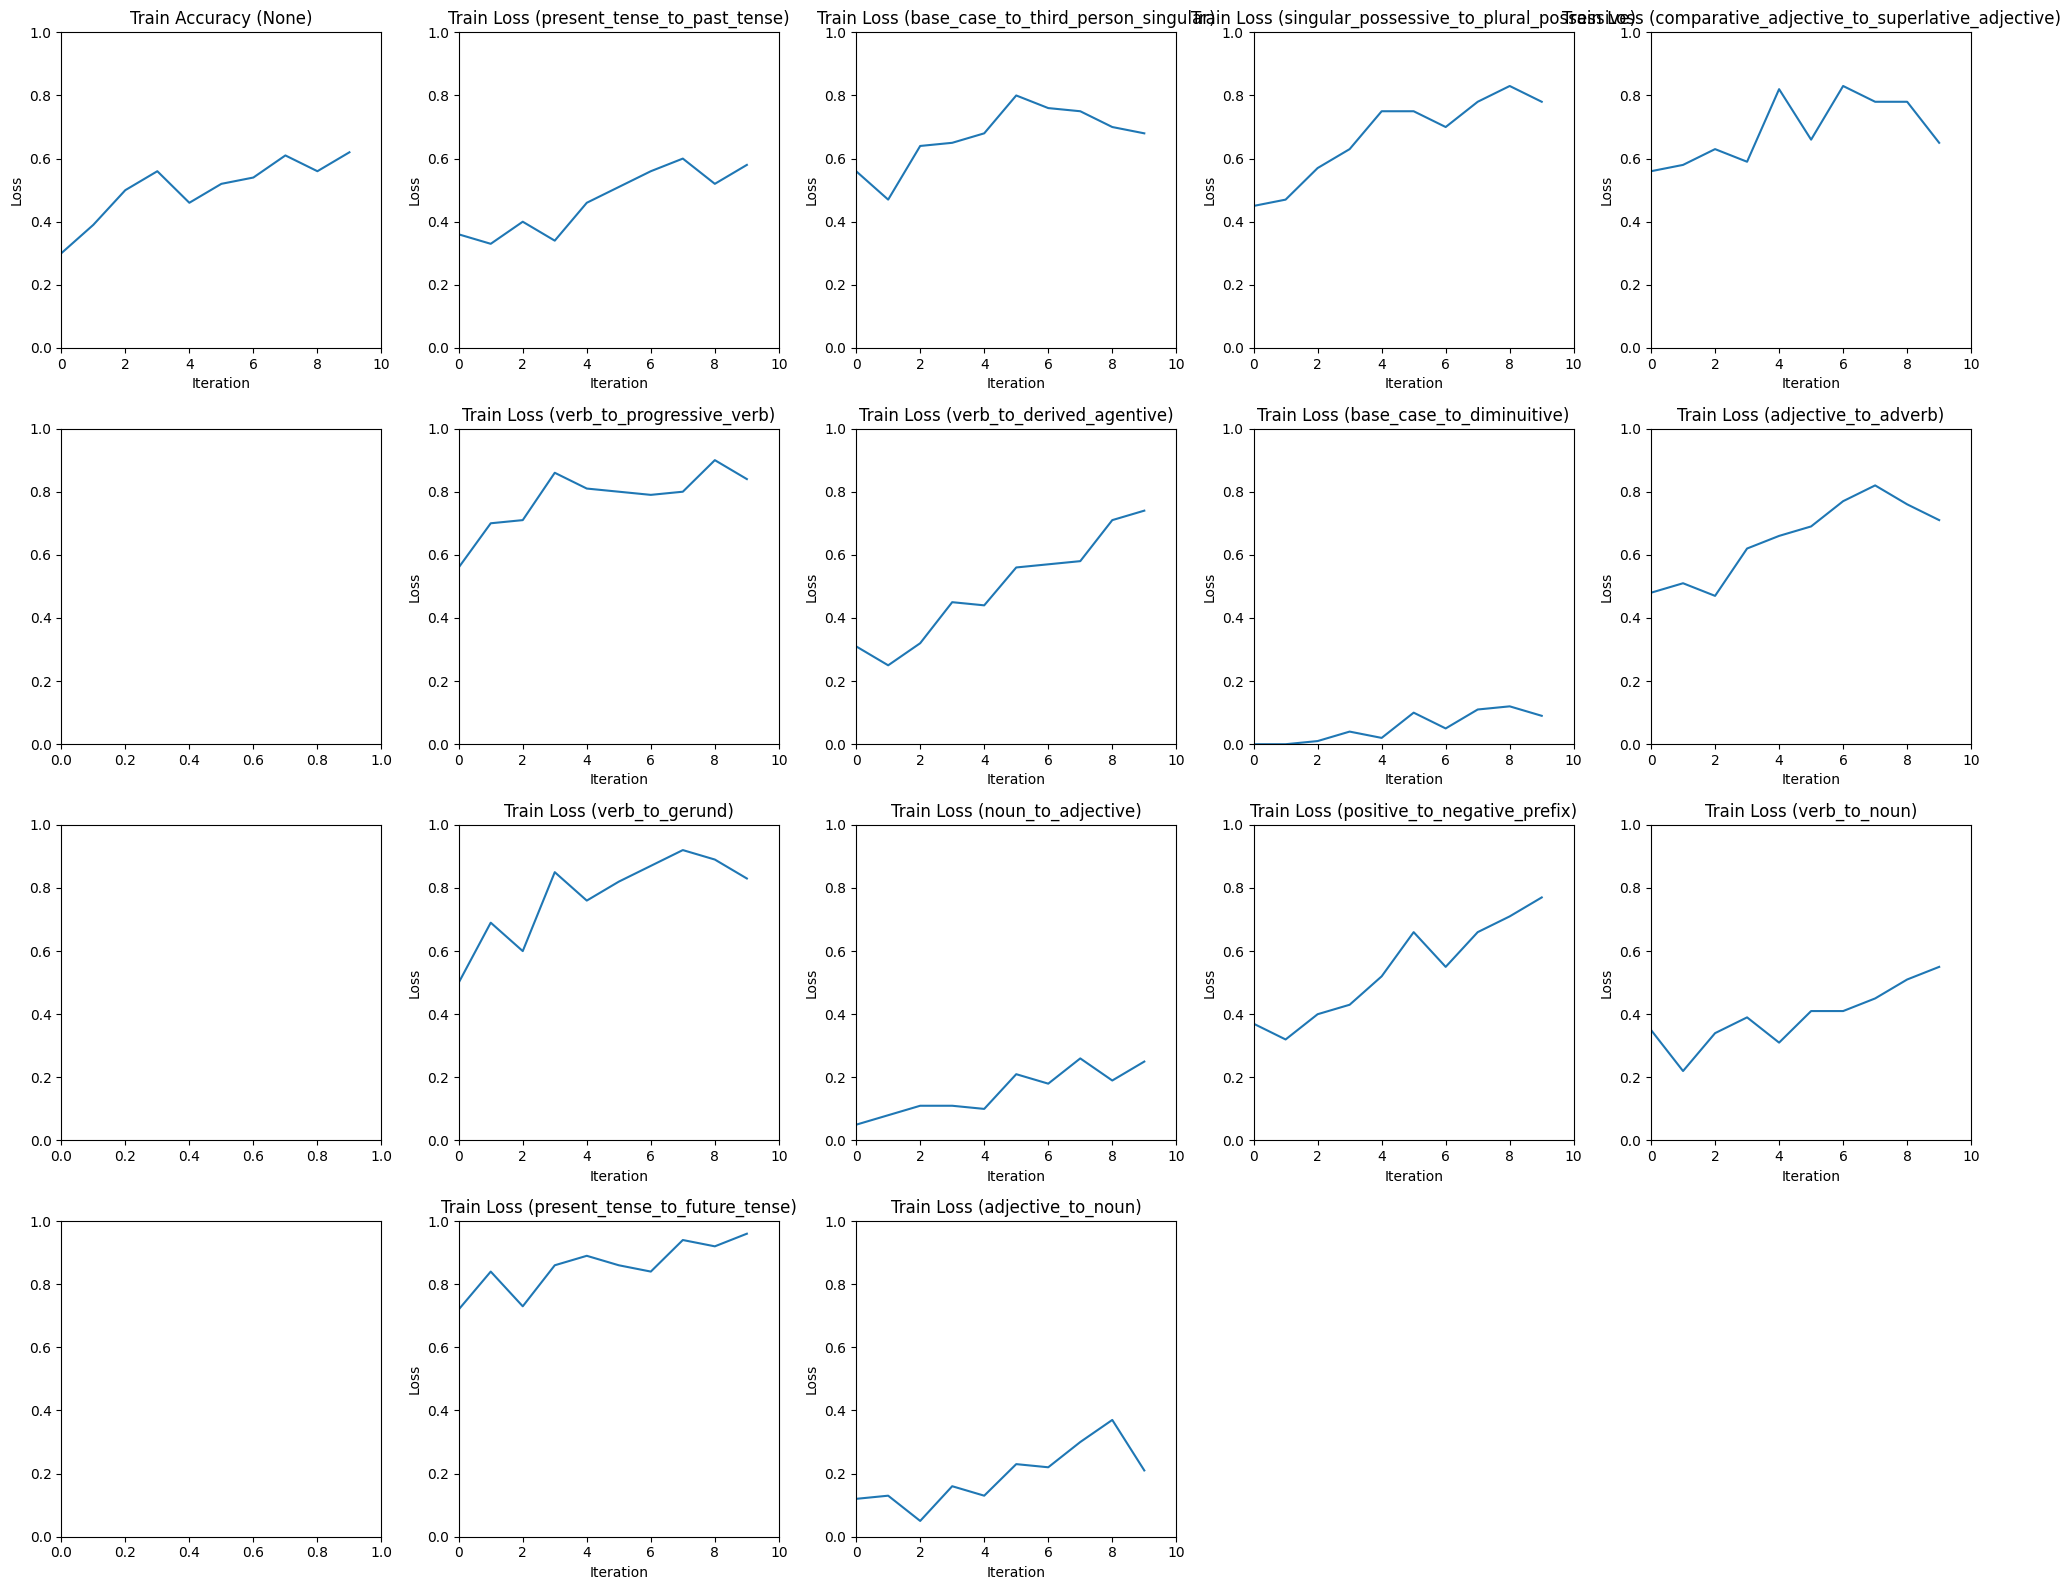

In [33]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for plots

# Plot for category 'None' (larger size)
axes[0, 0].plot(accuracies['train'][None])
axes[0, 0].set_title("Train Accuracy (None)")
axes[0, 0].set_xlabel("Iteration")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_xlim(0, 10)
axes[0, 0].set_ylim(0, 1)

# Merge the remaining subplots
for i in range(4):
    for j in range(1,5): # start from index 1
        ax = axes[i][j]
        category_index = i * 4 + j # Calculate the index to use for other categories

        if category_index < len(TRAIN_DATA_CATEGORIES) and TRAIN_DATA_CATEGORIES[category_index] != None:
          category = TRAIN_DATA_CATEGORIES[category_index]
          ax.plot(accuracies['train'][category])
          ax.set_title(f"Train Loss ({category})")
          ax.set_xlabel("Iteration")
          ax.set_ylabel("Loss")
          ax.set_xlim(0, 10)
          ax.set_ylim(0, 1)
        else:
          ax.axis('off') # Hide the empty subplots

plt.savefig('train_accuracy.png')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()